In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import pearsonr

In [3]:
initial = np.array([
    0.719, 0.555, 0.805, 0.766, 0.489, 0.924, 0.513, 1.109, 0.732, 0.653, 0.724, 0.681, 0.82
    ])

rebound = np.array([
    0.421, 0.336, 0.485, 0.452, 0.296, 0.549, 0.315, 0.668, 0.443, 0.3937, 0.429, 0.401, 0.51
    ])

initial_sqrt = np.sqrt(initial)
rebound_sqrt = np.sqrt(rebound)
x = initial_sqrt
y = rebound_sqrt

corr, _ = pearsonr(x, y)
print(corr)

0.9971393937786267


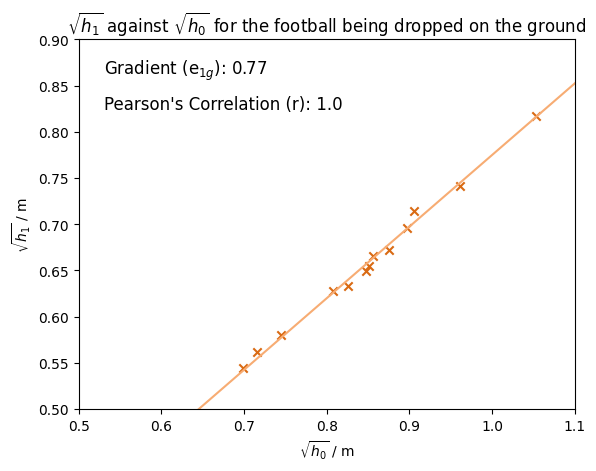

<Figure size 1920x1440 with 0 Axes>

In [4]:
cross_colour = '#d96a13'
line_colour = '#f7ac73'
plt.scatter(x, y, marker ='x', color=cross_colour)

plt.xlabel(r'$\sqrt{h_0}$ / m')
plt.ylabel(r'$\sqrt{h_1}$ / m')
plt.title(r'$\sqrt{h_1}$ against $\sqrt{h_0}$ for the football being dropped on the ground')

# Calculate the slope of the trendline passing through the origin
slope = np.sum(x * y) / np.sum(x * x)

# Generate trendline values
trendline_x = np.linspace(0, 1.5, 100)
trendline_y = slope * trendline_x

# Plot the trendline
plt.plot(trendline_x, trendline_y, color=line_colour)
plt.text(0.05, 0.95, f'Gradient (e$_{{1g}}$): {round(slope, 2)}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.text(0.05, 0.85, f'Pearson\'s Correlation (r): {round(corr, 2)}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

# Set the scale of both axes to be from 0 to 1
plt.xlim(0.5, 1.1)
plt.ylim(0.5, 0.9)

plt.figure(dpi=300)
plt.show()